In [3]:
!ls /mnt/data

'CHEXPERT DEMO.xlsx'			  'CheXpert-v1.0 batch 4 (train 3)'
'CheXpert-v1.0 batch 1 (validate & csv)'   README.md
'CheXpert-v1.0 batch 2 (train 1)'	   train_cheXbert.csv
'CheXpert-v1.0 batch 3 (train 2)'	   train_visualCheXbert.csv
'CheXpert-v1.0 batch 3 (train 2).zip'


In [6]:
!pip install pandas

In [14]:
path1 = "/mnt/data/train_cheXbert.csv"
path2 = "/mnt/data/train_visualCheXbert.csv"

In [54]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [55]:
df1 = pd.read_csv(path1)
df2 =  pd.read_csv(path2)

In [56]:
df1.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,No Finding
0,CheXpert-v1.0/train/patient00001/study1/view1_frontal.jpg,Female,68,Frontal,AP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0
1,CheXpert-v1.0/train/patient00002/study2/view1_frontal.jpg,Female,87,Frontal,AP,NaN,1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN
2,CheXpert-v1.0/train/patient00002/study1/view1_frontal.jpg,Female,83,Frontal,AP,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,CheXpert-v1.0/train/patient00002/study1/view2_lateral.jpg,Female,83,Lateral,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,CheXpert-v1.0/train/patient00003/study1/view1_frontal.jpg,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [57]:
# df2.head()

In [58]:
df1['Path'][:5]

0    CheXpert-v1.0/train/patient00001/study1/view1_frontal.jpg
1    CheXpert-v1.0/train/patient00002/study2/view1_frontal.jpg
2    CheXpert-v1.0/train/patient00002/study1/view1_frontal.jpg
3    CheXpert-v1.0/train/patient00002/study1/view2_lateral.jpg
4    CheXpert-v1.0/train/patient00003/study1/view1_frontal.jpg
Name: Path, dtype: object

In [59]:
# import pandas as pd

# Assuming your DataFrame is named 'df' and has a 'Path' column
lateral_count = df1['Path'].str.contains('lateral', case=False).sum()
frontal_count = df1['Path'].str.contains('frontal', case=False).sum()

print(f"Number of lateral images: {lateral_count}")
print(f"Number of frontal images: {frontal_count}")


Number of lateral images: 32387
Number of frontal images: 191027


In [19]:
print(df1.columns,df2.columns)

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices', 'No Finding'],
      dtype='object') Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices', 'No Finding'],
      dtype='object')


In [20]:
print(len(df1),len(df2))

223414 223414


In [46]:
# import pandas as pd

# Assuming 'df' is your DataFrame
count_no_finding = (df1['No Finding'] == 1.0).sum()
print(f"Number of rows with 'No Finding' == 1.0: {count_no_finding}")


Number of rows with 'No Finding' == 1.0: 21124


In [48]:
condition_columns = [
    'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
    'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
    'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
    'Support Devices', 'No Finding'
]
positive_counts = df1[condition_columns].apply(lambda x: (x == 1.0).sum())
print(positive_counts)


Enlarged Cardiomediastinum      7611
Cardiomegaly                   30566
Lung Opacity                  103092
Lung Lesion                     9346
Edema                          53058
Consolidation                  13682
Pneumonia                       4856
Atelectasis                    33862
Pneumothorax                   17869
Pleural Effusion               89314
Pleural Other                   3959
Fracture                        8701
Support Devices               113135
No Finding                     21124
dtype: int64


In [50]:
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual file path

# List of disease columns
disease_cols = [
    'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
    'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
    'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
    'Support Devices', 'No Finding'
]

# Count the number of diseases labeled as 1.0 in each row
df1['num_positive_diseases'] = df1[disease_cols].eq(1.0).sum(axis=1)

# Count rows with exactly one disease
single_disease_count = (df1['num_positive_diseases'] == 1).sum()

# Count rows with multiple diseases
multiple_diseases_count = (df1['num_positive_diseases'] > 1).sum()

print(f"Rows with exactly one disease: {single_disease_count}")
print(f"Rows with multiple diseases: {multiple_diseases_count}")


Rows with exactly one disease: 81889
Rows with multiple diseases: 123333


In [32]:
# ! ls /mnt/data/'CheXpert-v1.0 batch 2 (train 1)'

In [31]:
! ls /mnt/data/'CheXpert-v1.0 batch 2 (train 1)'/patient00250/study7

view1_frontal.jpg


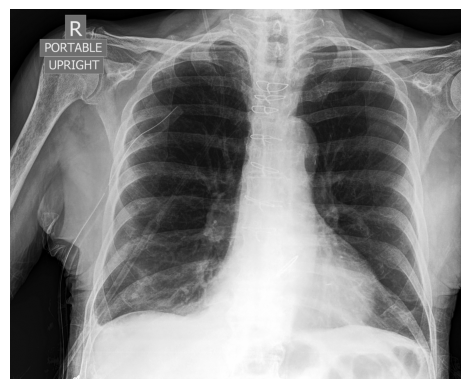

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Open the image file
image = Image.open("/mnt/data/CheXpert-v1.0 batch 2 (train 1)/patient00259/study3/view1_frontal.jpg").convert("L")

# Convert the image to a NumPy array
# image_array = np.array(image)

# Display the image
plt.imshow(image,cmap='gray')
plt.axis('off')  # Hide axis
plt.show()


In [61]:
import torch
import torch.nn as nn
from torchvision.models import vit_l_16, ViT_L_16_Weights

# Load pre-trained ViT-L/16 model
weights = ViT_L_16_Weights.IMAGENET1K_V1
model = vit_l_16(weights=weights)

# Modify the classification head for 14 classes
num_features = model.heads.head.in_features
model.heads.head = nn.Sequential(
    nn.Linear(num_features, 14),
    nn.Sigmoid()  # For multi-label classification
)

# Save the modified model
torch.save(model.state_dict(), 'model.pth')


Downloading: "https://download.pytorch.org/models/vit_l_16-852ce7e3.pth" to /home/jovyan/.cache/torch/hub/checkpoints/vit_l_16-852ce7e3.pth
100%|██████████| 1.13G/1.13G [00:17<00:00, 71.6MB/s]
